In [1]:
%load_ext autoreload
%autoreload 2
# Preprocess
import os
import shutil

from spatz.utils.preprocess import preprocess_file


PATH = 'data/simulations/'

# Delete the old folder of preprocessed files.
if os.path.isdir(PATH + 'temp/'):
    shutil.rmtree(PATH + 'temp/')

# Create the folder again.
os.mkdir(PATH + 'temp/')

# Preprocess the files.
for file in os.listdir(PATH):
    if not os.path.isdir(PATH + file) and '.txt' in file:
        df = preprocess_file(PATH + file)
        df.to_csv(PATH + 'temp/' + file.replace('.txt', '.csv'))

In [2]:
from spatz.simulation import Simulation, UniformTimeSteps

# Construct a time model.
timesteps = UniformTimeSteps(0.1, mu=0, sigma=0, delay_only=True)

# Construct a simulation instance with the time model.
simulation = Simulation(timesteps)

In [62]:
#Setup Sensors / observers

from spatz.sensors.antenna.tx_gain import AntennaTxGain

altitude = simulation.add_observer(['altitude'])
latitude = simulation.add_observer(['latitude'])
longitude = simulation.add_observer(['longitude'])

x = simulation.add_observer(['x'])
y = simulation.add_observer(['y'])
z = simulation.add_observer(['z'])
p = simulation.add_observer(['pitch_l'])

antenna_tx_gain_sensor = simulation.add_sensor(AntennaTxGain)

simulation.load(PATH + 'temp/' + '13_5DrougeOnly.csv')
logger = simulation.get_logger()



Processed 65160 lines in 1.0s.
Used 65160 lines due to step size


In [63]:
# Run simulation
for step, t, dt in simulation.run(verbose=True):
    # Get the sensor data for the current time
    gain = antenna_tx_gain_sensor()
    
    
    # Get the correct altitude data.
    altitude()
    latitude()
    longitude()

    x()
    y()
    z()
    p()

100%|█████████▉| 299.9999999999997/300.0 [00:32<00:00,  9.19it/s] 


In [66]:
df = logger.get_dataframe()
df

time antenna/tx_gain/out general/altitude general/latitude  \
0       0.1           -0.658078       319.189854         1.184825   
1       0.2           -0.658078       319.754649         1.184825   
2       0.3           -0.658077       320.689767         1.184825   
3       0.4           -0.658076        321.98961         1.184825   
4       0.5           -0.658075       323.649225         1.184825   
...     ...                 ...              ...              ...   
2995  299.6            0.209598       954.385196         1.186267   
2996  299.7            0.209596       950.544731         1.186267   
2997  299.8            0.209595       946.704266         1.186267   
2998  299.9            0.209593         942.8638         1.186267   
2999  300.0            0.209592       939.023335         1.186267   

     general/longitude general/x    general/y   general/z general/pitch_l  
0             0.367914       0.0     0.033017    0.189854        1.396263  
1             0.367914       0.0     0.131239    0.754649        1.396263  
2             0.367914       0.0     0.293862    1.689767        1.396263  
3             0.367914       0.0     0.519914     2.98961        1.396263  
4             0.367914       0.0     0.808532    4.649225        1.396263  
...                ...       ...          ...         ...             ...  
2995          0.367917  7.639079  9218.178485  628.737611        0.000023  
2996          0.367917  7.639903  9218.177327  624.897143        0.000023  
2997          0.367917  7.640726  9218.176168  621.056675        0.000023  
2998          0.367917   7.64155  9218.175009  617.216207        0.000023  
2999          0.367917  7.642373   9218.17385   613.37574        0.000023  

[3000 rows x 9 columns]

In [71]:
import matplotlib.pyplot as plt
import numpy as np

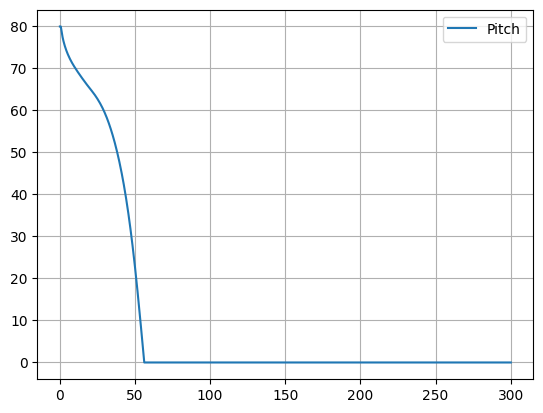

In [79]:

#plt.plot(df['time'][1:], df['antenna/tx_gain/out'][1:], label='Gain')
plt.grid()
plt.plot(df['time'][1:], df['general/pitch_l'][1:].apply(lambda x: x*(180/np.pi)), label='Pitch')
plt.legend()
plt.show()

In [8]:
from spatz.sensors.antenna.tx_gain import GainPattern
import numpy as np

Processed 65160 lines in 0.5s.
Used 65160 lines due to step size


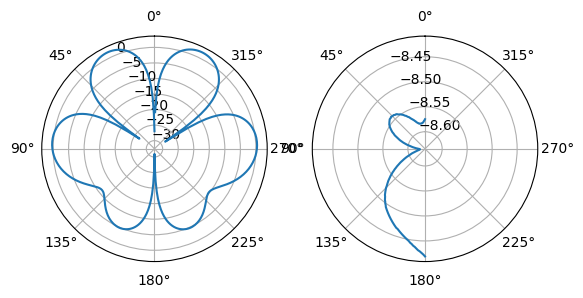

In [58]:

pattern = GainPattern("data/gain_pattern/farfield_2_45_GHz.txt",1)

fig, (ax1,ax2) = plt.subplots(1,2,subplot_kw={'projection': 'polar'})
ax1.set_theta_zero_location("N")
ax2.set_theta_zero_location("N")


angles_phi, gain_phi = pattern.get_phi_cut(0) # Cut through X-Z plane (In sim actually Y-)
ax1.plot(np.deg2rad(angles_phi), gain_phi)


angles_theta, gain_theta = pattern.get_theta_cut(5)
ax2.plot(np.deg2rad(angles_theta), gain_theta)



